<a href="https://colab.research.google.com/github/Entro01/ML-starter/blob/main/model_compaison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#modelling an algorithm to predict the species of the iris flower based on the given set of attributes.
#https://www.kaggle.com/datasets/uciml/iris

#Here we can see that given 4 features i.e sepal length, sepal width, petal length, and petal width determine whether a flower is Setosa, Versicolor or Virginica.

#    Sepal length,Sepal width, Petal length, Petal width are called feature/Variable/Input-variable/Independent-variable
#    Species are called Labels/Dependent-variable/out-variable/class/class-label/Response label

#selecting models
#since the iris dataset falls under the category of a supervised classification problem. the most common supervised classfication algorithms are the following:
#logistic regression
#svm
#naive bayes
#decision tree
#random forest

#my task is to implement each model individually, and then compare their accuraries in the end.

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

iris = pd.read_csv("Iris.csv")

In [190]:
print(iris.describe())
print(iris.shape)
print(iris.columns)
print(iris['Species'].value_counts())
print(iris.isnull().sum())
print(iris.head())
print(iris.tail())
iris.drop('Id', axis = 1, inplace = True)

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
(150, 6)
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     

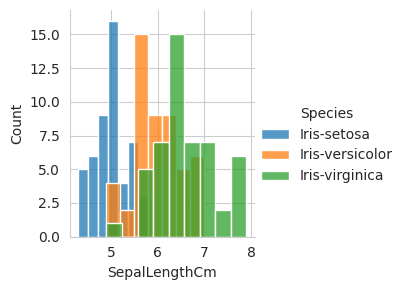

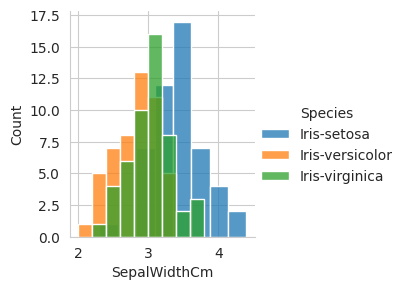

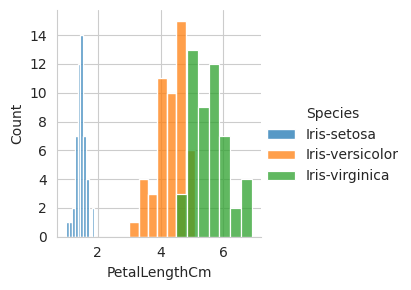

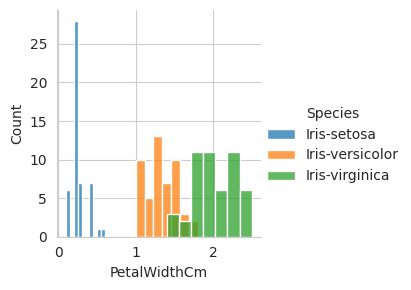

In [179]:
plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "SepalLengthCm").add_legend()

plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "SepalWidthCm").add_legend()

plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "PetalLengthCm").add_legend()

plot = sns.FacetGrid(iris, hue="Species")
plot.map(sns.histplot, "PetalWidthCm").add_legend()

plt.show()

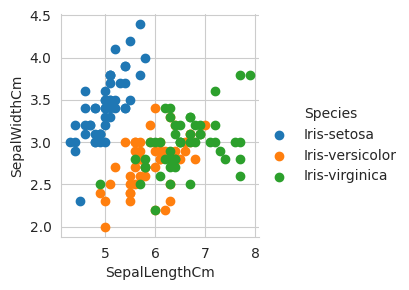

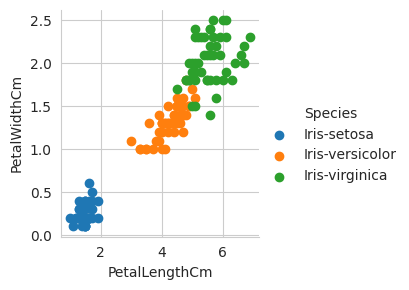

In [180]:
sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="Species") \
    .map(plt.scatter,"SepalLengthCm","SepalWidthCm") \
    .add_legend()
plt.show()

sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="Species") \
    .map(plt.scatter,"PetalLengthCm","PetalWidthCm") \
    .add_legend()
plt.show()

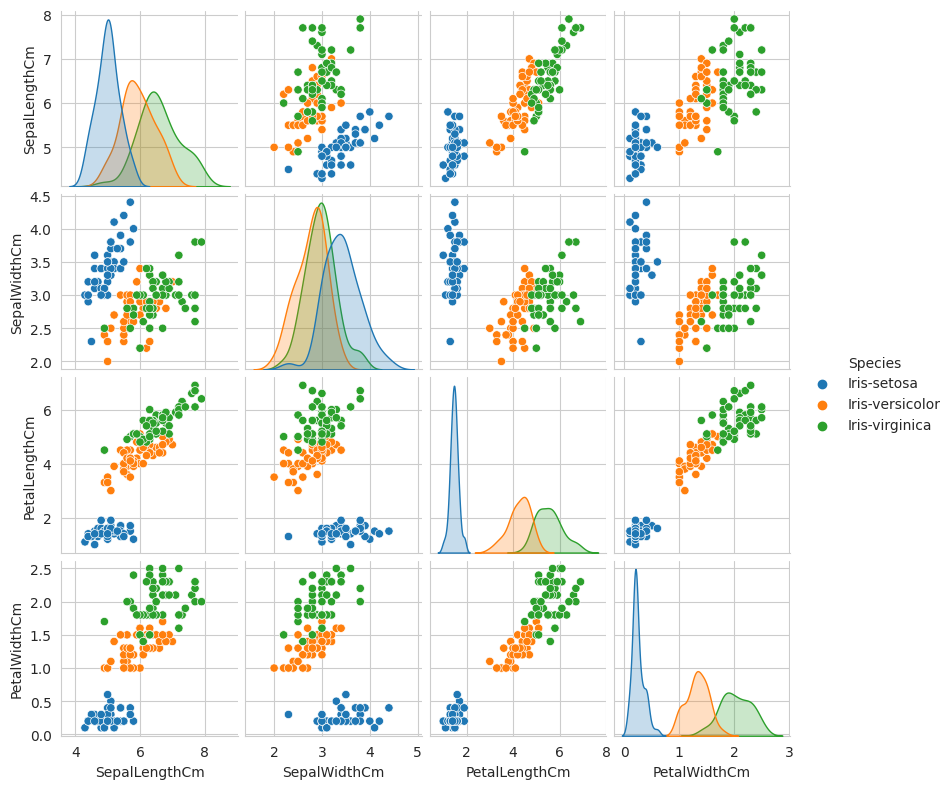

In [181]:
sns.pairplot(iris, hue='Species', height=2)

In [191]:
iris.corr()
#Here, the correlation coefficient between PetalLength and PetalWidth is 0.962757, which is much closer to 1, so we can remove any of the two variables.

<ipython-input-191-6a4d6ba24503>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [192]:
#iris.drop('PetalLengthCm', axis = 1, inplace = True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
iris.head(100)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


<Axes: >

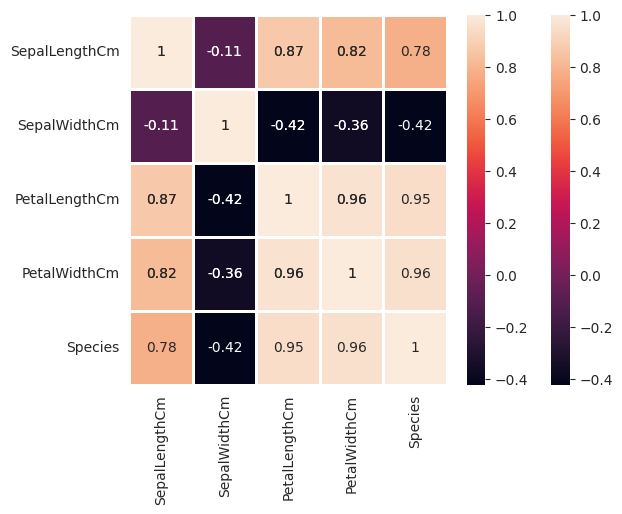

In [193]:
sns.heatmap(iris.corr().drop(['Species'], axis = 1).drop(['Species'], axis = 0), linewidth=1, annot=True)
sns.heatmap(iris.corr(), linewidth=1, annot=True)

In [194]:
from sklearn.model_selection import train_test_split

X = iris.drop(columns = ['Species'])
Y = iris['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [195]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [196]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

LR_accuracy = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy: ", LR_accuracy)

[[13  0  0]
 [ 0  9  0]
 [ 0  2 14]]
Accuracy:  94.73684210526315


In [197]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', random_state = 0)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

SVM_accuracy = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy: ", SVM_accuracy)

[[13  0  0]
 [ 0  9  0]
 [ 0  1 15]]
Accuracy:  97.36842105263158


In [198]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

DT_accuracy = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy: ", DT_accuracy)

[[13  0  0]
 [ 0  9  0]
 [ 0  2 14]]
Accuracy:  94.73684210526315


In [199]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

NB_accuracy = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy: ", NB_accuracy)

[[13  0  0]
 [ 0  9  0]
 [ 0  3 13]]
Accuracy:  92.10526315789474


In [201]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

RF_accuracy = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy: ", RF_accuracy)

[[13  0  0]
 [ 0  9  0]
 [ 0  3 13]]
Accuracy:  92.10526315789474


In [202]:
print("ACCURACIES")
print("Logistic Regression: ", LR_accuracy)
print("SVM: ", SVM_accuracy)
print("Decision Tree: ", DT_accuracy)
print("Naive Bias: ", NB_accuracy)
print("Random Forrest: ", RF_accuracy)

ACCURACIES
Logistic Regression:  94.73684210526315
SVM:  97.36842105263158
Decision Tree:  94.73684210526315
Naive Bias:  92.10526315789474
Random Forrest:  92.10526315789474
